In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CODING/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [54]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [55]:
df.duplicated().sum()

0

In [56]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
#need to fill in item weight with imputer will be below

In [58]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [59]:
grocery_Type = df['Outlet_Type'] =='Grocery Store'
df[grocery_Type].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 3 to 8509
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1083 non-null   object 
 1   Item_Weight                555 non-null    float64
 2   Item_Fat_Content           1083 non-null   object 
 3   Item_Visibility            1083 non-null   float64
 4   Item_Type                  1083 non-null   object 
 5   Item_MRP                   1083 non-null   float64
 6   Outlet_Identifier          1083 non-null   object 
 7   Outlet_Establishment_Year  1083 non-null   int64  
 8   Outlet_Size                528 non-null    object 
 9   Outlet_Location_Type       1083 non-null   object 
 10  Outlet_Type                1083 non-null   object 
 11  Item_Outlet_Sales          1083 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 110.0+ KB


In [60]:
df[grocery_Type]['Outlet_Size'].value_counts()
small_Value = 'Small'
df.loc[grocery_Type,'Outlet_Size'] = small_Value
#noticed all grocery stores are type small or nan so filled them in small

In [61]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
df.groupby(['Outlet_Location_Type','Outlet_Size']).sum()


Item_Weight  ...  Item_Outlet_Sales
Outlet_Location_Type Outlet_Size               ...                   
Tier 1               Medium         12013.225  ...       2.183970e+06
                     Small          11966.125  ...       2.298089e+06
Tier 2               Small          11931.295  ...       2.268123e+06
Tier 3               High           12121.730  ...       2.142664e+06
                     Medium         11946.465  ...       5.305749e+06
                     Small           7166.800  ...       1.883402e+05

[6 rows x 5 columns]

In [63]:
Tier2 = df['Outlet_Location_Type']=='Tier 2'
df[Tier2].isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [64]:
df.loc[Tier2,'Outlet_Size'] = small_Value
#I noticed tier 2 outlet types were all small so filled in the rest small

In [65]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [66]:
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [67]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [68]:
#checked all the columns value counts and fixed all the inconsistent data

In [69]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


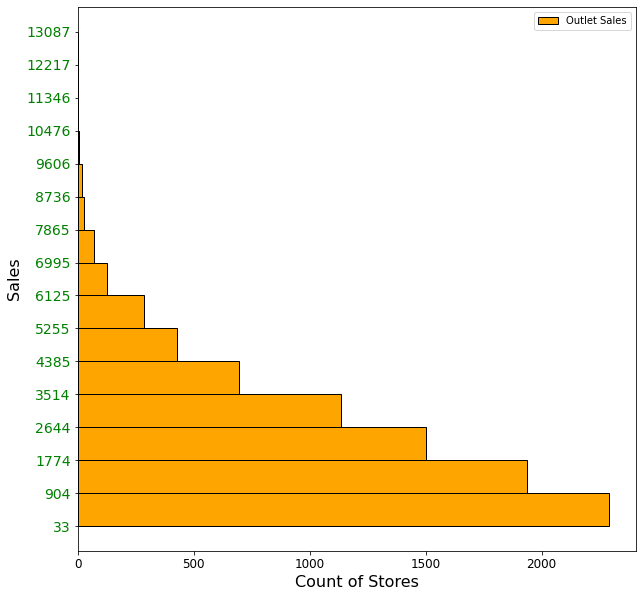

In [71]:
plt.figure(figsize=(10,10))
counts,bins,patches = plt.hist(df['Item_Outlet_Sales'],
         bins=15,
         label='Outlet Sales',
         color='orange',
         edgecolor='black',
         orientation='horizontal')
plt.xlabel('Count of Stores',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.yticks(bins,color='green',fontsize=14)
plt.xticks(fontsize=12)
plt.legend();

In [72]:
#show  certain amount of stores that have that amount of sales

In [73]:
large_outlet = df['Outlet_Size']=='High'
small_outlet = df['Outlet_Size']=='Small'
item_price1 = df[large_outlet]['Item_Outlet_Sales']
item_price2 = df[small_outlet]['Item_Outlet_Sales']
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

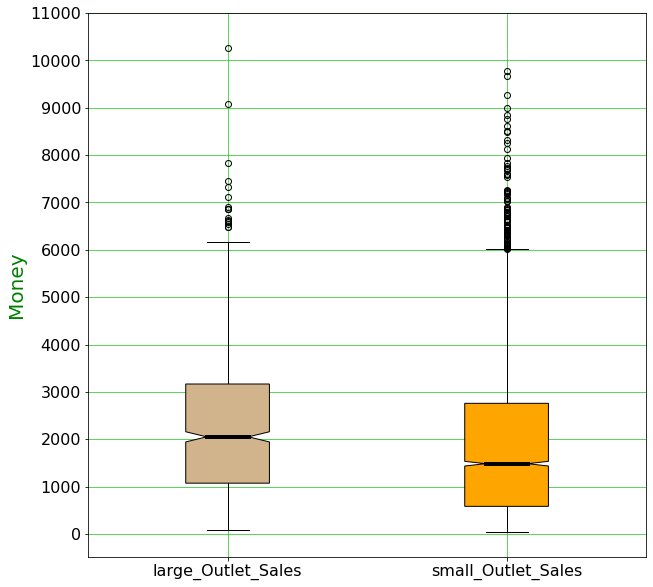

In [74]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
boxplot = axes.boxplot([item_price1,item_price2],
             labels=['large_Outlet_Sales','small_Outlet_Sales'],
             notch=True,
             widths=.3,
             patch_artist=True,
             boxprops= dict(color='black',facecolor='orange'),
             medianprops = dict(linewidth=4,color='black')
             )
box1 = boxplot['boxes'][0]
box1.set_facecolor('tan')
plt.ylabel('Money',color='green',fontsize=20)
plt.yticks(np.arange(0,12000, step=1000),fontsize=16)
plt.xticks(fontsize=16)
plt.grid(color='limegreen');

In [75]:
#box charts to show sales of a large outlet vs small outlet stores

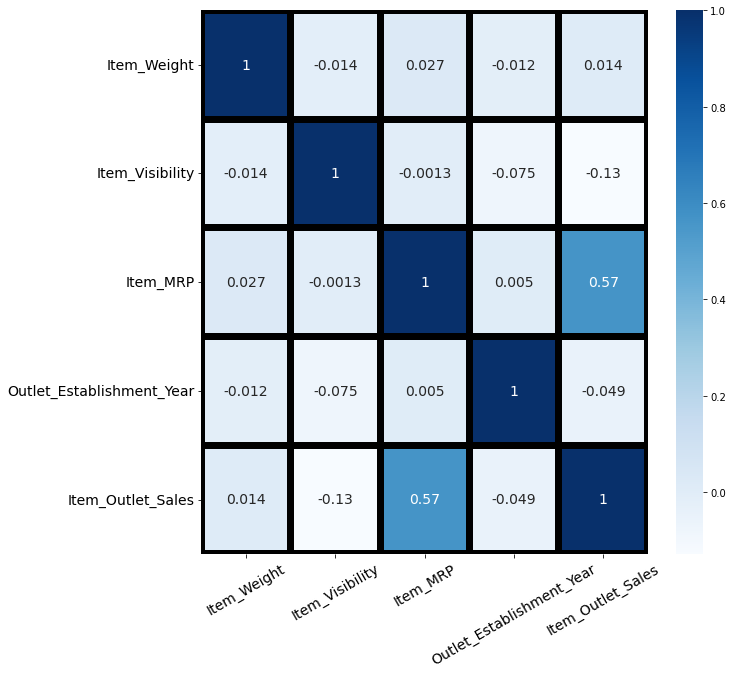

In [76]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,cmap='Blues', annot=True,linewidths=6,linecolor='black',annot_kws={"fontsize":14})
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14,rotation=0);

In [77]:
#Correlation data to see if anything is neagtively or postively correlated

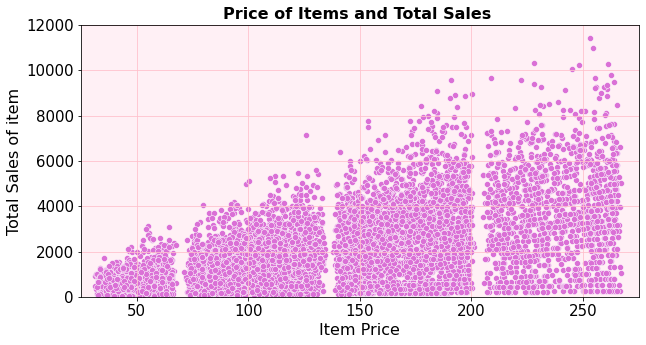

In [78]:
axes, fig = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
axes = sns.scatterplot(x=df['Item_MRP'] ,y=df['Item_Outlet_Sales'],color='orchid')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
axes.set_xlabel("Item Price", fontsize = 16)
axes.set_ylabel("Total Sales of item", fontsize = 16)
plt.xlim(left=25,right=275)
plt.ylim(bottom=0,top=12000)
axes.set_facecolor(color='lavenderblush')
plt.grid(color='pink')
plt.title('Price of Items and Total Sales ',fontsize=16,weight='bold');

In [79]:
#You can see a positive corellation of item price to total sales and thats what my scatter plot shows

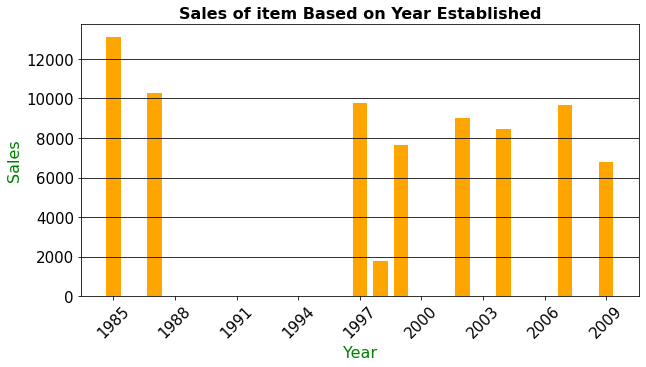

In [80]:
plt.figure(figsize=(10,5))
plt.bar(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'],color='orange',width=.7)
plt.xticks(np.arange(1985,2010,step=3),fontsize='15',rotation=45)
plt.yticks(fontsize='15')
plt.xlabel('Year',fontsize='16',color='green')
plt.ylabel('Sales',fontsize='16',color='green')
plt.grid(color='black',axis='y')
plt.title('Sales of item Based on Year Established',fontsize='16',weight='bold');

In [81]:
#This bar chart shows sale of item based on year established.

In [82]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [83]:
year_series = df['Outlet_Establishment_Year'].value_counts()
year_key_sorted = year_series.keys().sort_values(ascending=True)
year_key_sorted

Int64Index([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009], dtype='int64')

In [84]:
mean_of_year = []
for x in year_key_sorted:
  df_years = df['Outlet_Establishment_Year'] == x
  mean_of_year.append(df.loc[df_years,'Item_Outlet_Sales'].mean())
print(mean_of_year)


[2483.6774743677356, 2298.9952555793975, 2277.8442668817192, 339.3516619819822, 2348.354634623656, 2192.3847976318607, 2438.8418660215075, 2340.67526349892, 1995.4987392241392]


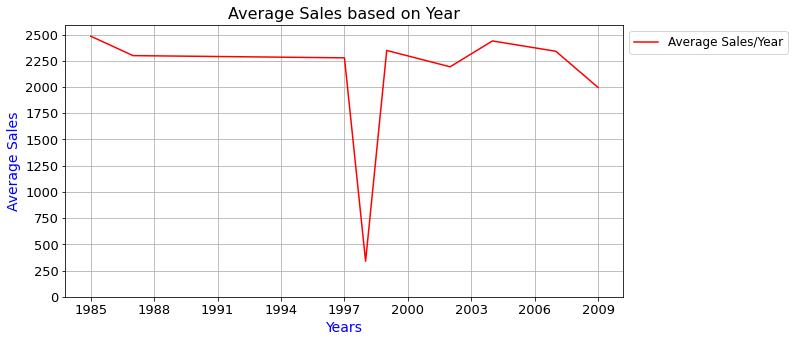

In [85]:
axes, fig = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
axes = plt.plot(year_key_sorted,mean_of_year,color='red',label='Average Sales/Year')
plt.xticks(np.arange(1985,2010, step=3),fontsize=13)
plt.yticks(np.arange(0,2501,step=250),fontsize=13)
plt.xlabel('Years',fontsize=14,color='b')
plt.ylabel('Average Sales',fontsize=14,color='b')
plt.title("Average Sales based on Year",fontsize=16)
plt.legend(bbox_to_anchor=(1,1),fontsize=12)
plt.grid();

In [86]:
# grouped all stores by year and got average item sales.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [89]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#train test split before imputing missing number data

In [103]:
num_select = make_column_selector(dtype_include='number')
cat_select = make_column_selector(dtype_include='object')

num_columns = num_select(X_train)
cat_columns = cat_select(X_train)

In [102]:
#impute missing values used mean before 
mean_imputer = SimpleImputer()
mean_imputer.fit(X_train[num_columns])

X_train.loc[:, num_columns] = mean_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = mean_imputer.transform(X_test[num_columns])

In [96]:
print(X_train.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [104]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [99]:
cat_tuple = (encoder, cat_columns)
num_tuple = (scaler, num_columns)

In [100]:
col_trans = make_column_transformer(cat_tuple, num_tuple, remainder='passthrough')
lin_reg = LinearRegression()

In [101]:
pipe = make_pipeline(col_trans,lin_reg)